/opt/anaconda3/envs/research/lib/python3.11/site-packages/gstools/field/plot.py:406: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


<Axes: title={'center': 'Field 2D structured: (100, 100)'}, xlabel='$x$', ylabel='$y$'>

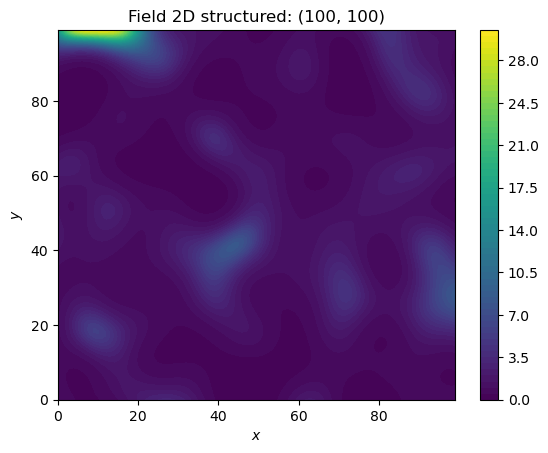

In [1]:
"""
log-normal fields
-----------------

Here we transform a field to a log-normal distribution:

See :any:`transform.normal_to_lognormal`
"""
import gstools as gs

# structured field with a size of 100x100 and a grid-size of 1x1
x = y = range(100)
model = gs.Gaussian(dim=2, var=1, len_scale=10)
srf = gs.SRF(model, seed=20170519)
srf.structured([x, y])
srf.transform("normal_to_lognormal")  # also "lognormal" works
srf.plot()


<Axes: title={'center': 'Field 2D structured: (100, 100)'}, xlabel='$x$', ylabel='$y$'>

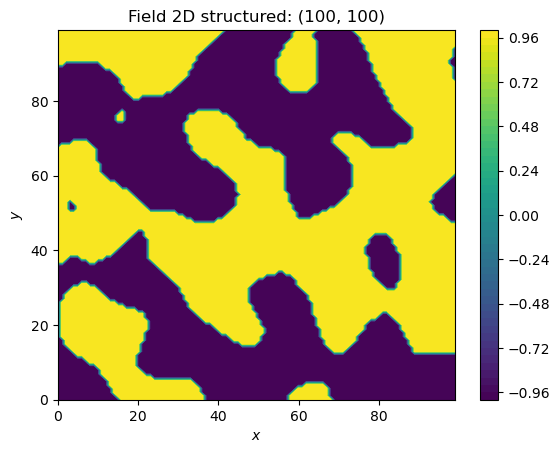

In [2]:
"""
binary fields
-------------

Here we transform a field to a binary field with only two values.
The dividing value is the mean by default and the upper and lower values
are derived to preserve the variance.

See :any:`transform.binary`
"""
import gstools as gs

# structured field with a size of 100x100 and a grid-size of 1x1
x = y = range(100)
model = gs.Gaussian(dim=2, var=1, len_scale=10)
srf = gs.SRF(model, seed=20170519)
srf.structured([x, y])
srf.transform("binary")
srf.plot()


<Axes: title={'center': 'Field 2D structured: (200, 200)'}, xlabel='$x$', ylabel='$y$'>

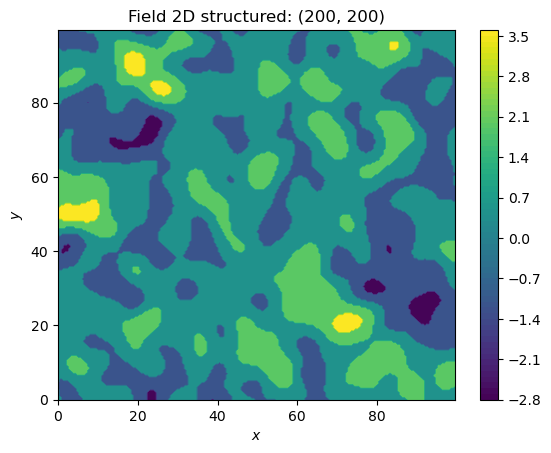

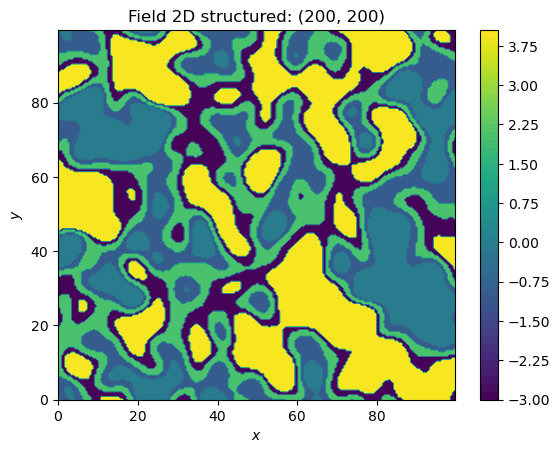

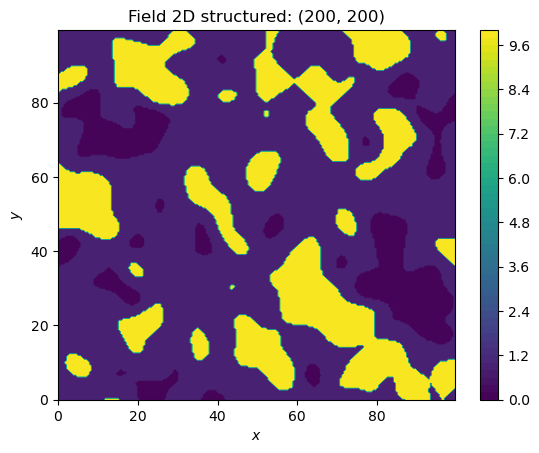

In [3]:
"""
Discrete fields
---------------

Here we transform a field to a discrete field with values.
If we do not give thresholds, the pairwise means of the given
values are taken as thresholds.
If thresholds are given, arbitrary values can be applied to the field.

See :any:`transform.discrete`
"""
import numpy as np

import gstools as gs

# Structured field with a size of 100x100 and a grid-size of 0.5x0.5
x = y = np.arange(200) * 0.5
model = gs.Gaussian(dim=2, var=1, len_scale=5)
srf = gs.SRF(model, seed=20170519)
srf.structured([x, y])

###############################################################################
# Create 5 equidistanly spaced values, thresholds are the arithmetic means

values1 = np.linspace(np.min(srf.field), np.max(srf.field), 5)
srf.transform("discrete", store="f1", values=values1)
srf.plot("f1")

###############################################################################
# Calculate thresholds for equal shares
# but apply different values to the separated classes

values2 = [0, -1, 2, -3, 4]
srf.transform("discrete", store="f2", values=values2, thresholds="equal")
srf.plot("f2")

###############################################################################
# Create user defined thresholds
# and apply different values to the separated classes

values3 = [0, 1, 10]
thresholds = [-1, 1]
srf.transform("discrete", store="f3", values=values3, thresholds=thresholds)
srf.plot("f3")


<Axes: title={'center': 'Field 2D structured: (100, 100)'}, xlabel='$x$', ylabel='$y$'>

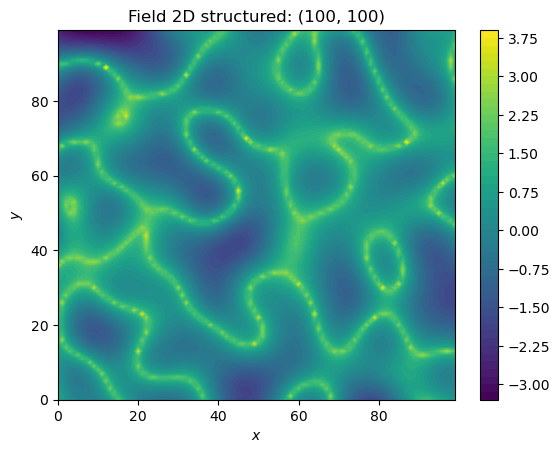

In [4]:
"""
Zinn & Harvey transformation
----------------------------

Here, we transform a field with the so called "Zinn & Harvey" transformation presented in
`Zinn & Harvey (2003) <https://www.researchgate.net/publication/282442995_zinnharvey2003>`__.
With this transformation, one could overcome the restriction that in ordinary
Gaussian random fields the mean values are the ones being the most connected.

See :any:`transform.zinnharvey`
"""
import gstools as gs

# structured field with a size of 100x100 and a grid-size of 1x1
x = y = range(100)
model = gs.Gaussian(dim=2, var=1, len_scale=10)
srf = gs.SRF(model, seed=20170519)
srf.structured([x, y])
srf.transform("zinnharvey", conn="high")
srf.plot()


<Axes: title={'center': 'Field 2D structured: (100, 100)'}, xlabel='$x$', ylabel='$y$'>

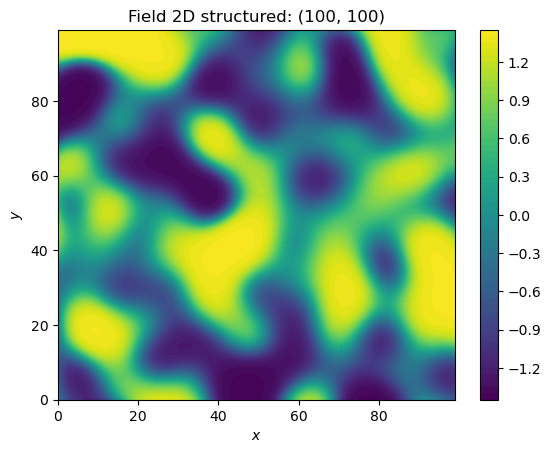

In [5]:
"""
Bimodal fields
--------------

We provide two transformations to obtain bimodal distributions:

* `arcsin <https://en.wikipedia.org/wiki/Arcsine_distribution>`__.
* `uquad <https://en.wikipedia.org/wiki/U-quadratic_distribution>`__.

Both transformations will preserve the mean and variance of the given field by default.

See: :any:`transform.normal_to_arcsin` and :any:`transform.normal_to_uquad`
"""
import gstools as gs

# structured field with a size of 100x100 and a grid-size of 1x1
x = y = range(100)
model = gs.Gaussian(dim=2, var=1, len_scale=10)
srf = gs.SRF(model, seed=20170519)
field = srf.structured([x, y])
srf.transform("normal_to_arcsin")  # also "arcsin" works
srf.plot()


Max binary value: -8.0


<Axes: title={'center': 'Field 2D structured: (100, 100)'}, xlabel='$x$', ylabel='$y$'>

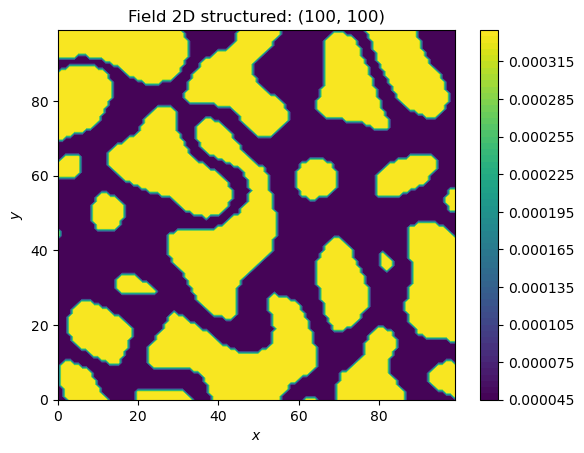

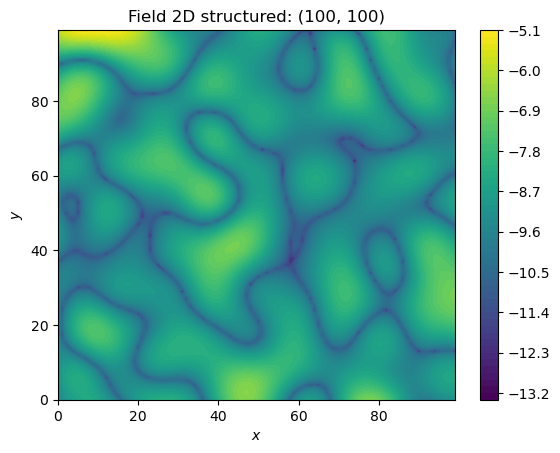

In [6]:
"""
Combinations
------------

You can combine different transformations simply by successively applying them.

Here, we first force the single field realization to hold the given moments,
namely mean and variance.
Then we apply the Zinn & Harvey transformation to connect the low values.
Afterwards the field is transformed to a binary field and last but not least,
we transform it to log-values.

We can select the desired field by its name and we can define an output name
to store the field.

If you don't specify `field` and `store` everything happens inplace.
"""
# sphinx_gallery_thumbnail_number = 1
import gstools as gs

# structured field with a size of 100x100 and a grid-size of 1x1
x = y = range(100)
model = gs.Gaussian(dim=2, var=1, len_scale=10)
srf = gs.SRF(model, mean=-9, seed=20170519)
srf.structured([x, y])
srf.transform("force_moments", field="field", store="f_forced")
srf.transform("zinnharvey", field="f_forced", store="f_zinnharvey", conn="low")
srf.transform("binary", field="f_zinnharvey", store="f_binary")
srf.transform("lognormal", field="f_binary", store="f_result")
srf.plot(field="f_result")

###############################################################################
# The resulting field could be interpreted as a transmissivity field, where
# the values of low permeability are the ones being the most connected
# and only two kinds of soil exist.
#
# All stored fields can be accessed and plotted by name:

print("Max binary value:", srf.f_binary.max())
srf.plot(field="f_zinnharvey")
